In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npts = 1000
sigma = 0.2

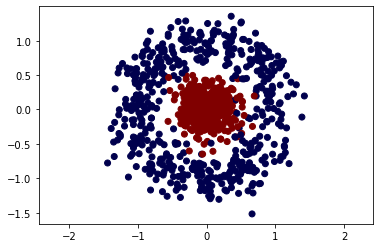

In [3]:
#generate the data
def gen_data(npts):
    
    r = np.zeros((npts,2))

    ident = np.zeros((npts,2))

    for ii in range(npts):

        a = np.random.rand()
        which = np.round(a)
        theta = 2*np.pi*np.random.rand()

        r[ii,0] = np.cos(theta)*which + np.random.normal(0,sigma)
        r[ii,1] = np.sin(theta)*which + np.random.normal(0,sigma)
        
        ident[ii,int(which)] = 1
    return r,ident
    
train_r,train_ident = gen_data(npts)
test_r,test_ident = gen_data(npts)

plt.scatter(train_r[:,0],train_r[:,1],c = train_ident[:,0],cmap = 'seismic')
plt.axis('equal')
plt.show()



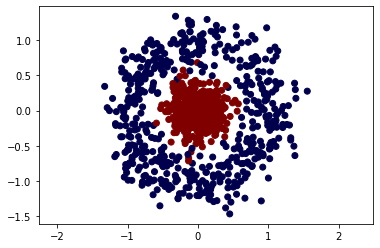

In [4]:
def gen_high_d_data(npts,clusters_per_cat):
    
    r = np.zeros((npts,2))
    ident = np.zeros((npts,2))

    for ii in range(npts):

        a = np.random.rand()
        which = np.round(a)
        theta = 2*np.pi*np.random.rand()
        radial = np.round(np.random.rand()*clusters_per_cat)

        r[ii,0] = np.cos(theta)*(2*radial + which) + np.random.normal(0,sigma)
        r[ii,1] = np.sin(theta)*(2*radial + which) + np.random.normal(0,sigma)
        
        ident[ii,int(which)] = 1
    return r,ident

train_r,train_ident = gen_high_d_data(npts,0)
test_r,test_ident = gen_high_d_data(npts,0)

plt.scatter(train_r[:,0],train_r[:,1],c = train_ident[:,0],cmap = 'seismic')
plt.axis('equal')
plt.show()

In [5]:
def initiate_layers(architecture):
    n_layers = len(architecture)
    params = {}
    
    for idx, layer in enumerate(architecture):
        
        input_size = layer['input_dim']
        output_size = layer['output_dim']
        
        params['W' + str(idx)] = np.random.randn(output_size,input_size)
        params['b' + str(idx)] = np.random.randn(output_size)
    
    return params

In [6]:
def costx(truth,guess):
    return 0.5*np.sum(np.square(truth - guess))

In [7]:
def sigmoid(vector):
    return 1/(1 + np.exp(-vector))

In [8]:
def dsig(vec):
    return sigmoid(vec)*(1 - sigmoid(vec))

In [9]:
def update_weights(architecture,params,gradients,learning_rate):
    for idx, layer in enumerate(architecture):
        params['W' + str(idx)] += -gradients['dCdw' + str(idx)]*learning_rate
        params['b' + str(idx)] += -gradients['dCdb' + str(idx)]*learning_rate
    return params

In [11]:
def forward_prop_one(architecture,params,inpt):
    memory = {}
    A = inpt[:]
    
    for idx, layer in enumerate(architecture):
        A_prec = A
        
        W = params['W' + str(idx)]
        b = params['b' + str(idx)]
        
        z = np.add(np.dot(W,A_prec),b)
        #print('dot shape = ',np.shape(np.dot(W,A_prec)))
        #print('b shape = ', np.shape(b))
        print('z shape = ',np.shape(z))
        A = sigmoid(z)
        #print('A shape = ',np.shape(A))
        
        memory['A_in' + str(idx)] = A_prec
        memory['z' + str(idx)] = z
    
    return A, memory

In [12]:
def plot_status(architecture,params,test_r,test_ident,npts,bigtitle):
    guesses = np.zeros(np.shape(test_ident))
    for ii in range(npts):
        guess,mem = forward_prop_one(architecture,params,test_r[ii,:])
        #print(guess)
        guesses[ii,:] = guess
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle(bigtitle)
    ax1.scatter(test_r[:,0],test_r[:,1],c = test_ident[:,0])
    ax1.set_title('truth')
    ax1.axis('equal')
    ax1.axis('off')
    
    ax2.scatter(test_r[:,0],test_r[:,1],c = np.round(guesses[:,0]))
    ax2.set_title('estimate')
    ax2.axis('equal')
    ax2.axis('off')
    plt.show()
    
    return np.sum(np.square(guesses[:,0] - test_ident[:,0]))/np.size(guesses[:,0])

In [13]:
def back_prop_one(memory,params,truth,guess,architecture):
    #this will calculate the gradients for one training example
    
    delta = {}
    gradients = {}
    nlayer = len(architecture)
    
    for idx, layer in enumerate(architecture):
        
        
        l = nlayer - (idx + 1)
        zl = memory['z' + str(l)]
        Alm1 = memory['A_in' + str(l)]
        
        #print(l)
        
        if l == (nlayer - 1):
            dl = (guess - truth)*dsig(zl)
        else:
            Wl1 = params['W' + str(l + 1)]
            dl1 = delta['d' + str(l + 1)]
            dl = np.dot(np.transpose(Wl1),dl1)*dsig(zl)
        
        delta['d' + str(l)] = dl
        gradients['dCdb' + str(l)] = dl
        gradients['dCdw' + str(l)] = np.outer(dl,Alm1)
    
    return delta, gradients

In [14]:
def average_gradients(grads,architecture,start,stop):
    
    av_grads = {}
    cutoff = stop-start
    
    for idx, layer in enumerate(architecture):
        dCdw = 0
        dCdb = 0
        for ii in range(start,stop):
            dCdw += grads['G' + str(ii)]['dCdw' + str(idx)]
            dCdb += grads['G' + str(ii)]['dCdb' + str(idx)]
        av_grads['dCdw' + str(idx)] = dCdw/cutoff
        av_grads['dCdb' + str(idx)] = dCdb/cutoff
    
    return av_grads

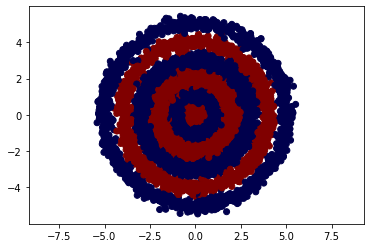

In [15]:
nclusters = 2
npts = 10000
r_high_d, ident_high_d = gen_high_d_data(npts, nclusters)
test_r_high_d,test_ident_high_d = gen_high_d_data(npts, nclusters)

plt.scatter(r_high_d[:,0],r_high_d[:,1],c = ident_high_d[:,0],cmap = 'seismic')
plt.axis('equal')
plt.show()

In [16]:
in_dim = 2
nneuron = 24
out_dim = 2
nbatches = 1000

nepoch = 1000
learning_rate = 0.1

In [17]:
def gen_architecture(in_dim,out_dim,nneuron,nhidden):
    
    
    
    return architecture

In [18]:
ARCHITECTURE = [
    {'input_dim': in_dim, 'output_dim': nneuron},
    {'input_dim': nneuron, 'output_dim': nneuron},
    {'input_dim': nneuron, 'output_dim': out_dim},
]

In [19]:
#lets try to train a model
def train_weights(ARCHITECTURE,nbatches,nepoch,learning_rate,train_r,train_ident,test_r,test_ident):
    cutoff = int(npts/nbatches)

    params = initiate_layers(ARCHITECTURE)

    e1 = plot_status(ARCHITECTURE,params,test_r,test_ident,npts,'pre-training')

    for tt in range(nepoch):
        for batch in range(nbatches):
            grad_storage = {}
            start = int(batch*cutoff)
            stop = int((batch + 1)*cutoff)
            for ii in range(start,stop):
                inpt = train_r[ii,:]
                truth = train_ident[ii,:]
                guess,memory = forward_prop_one(ARCHITECTURE,params,inpt)
                delta,gradients = back_prop_one(memory,params,truth,guess,ARCHITECTURE)

                grad_storage['G' + str(ii)] = gradients

        #actually average gradients over epochs
            av_grads = average_gradients(grad_storage,ARCHITECTURE,start,stop)
            params = update_weights(ARCHITECTURE,params,gradients,learning_rate)

    error = plot_status(ARCHITECTURE,params,test_r,test_ident,npts,'post-training')
    return params, error

z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


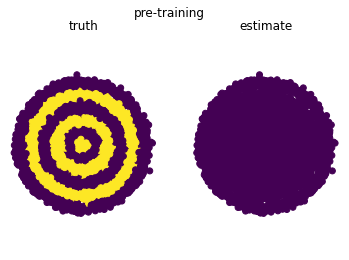

z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)


z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)
z shape =  (24,)
z shape =  (24,)
z shape =  (2,)


KeyboardInterrupt: 

In [20]:
params,err = train_weights(ARCHITECTURE,nbatches,nepoch,learning_rate,r_high_d,ident_high_d,test_r_high_d,test_ident_high_d)

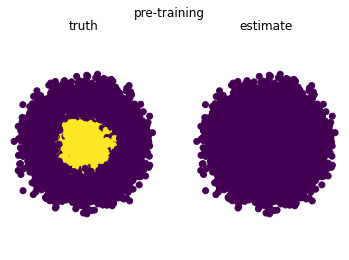

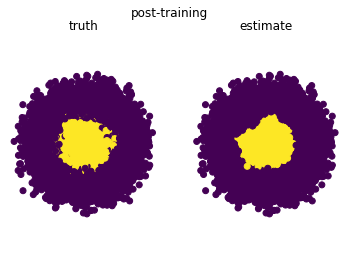

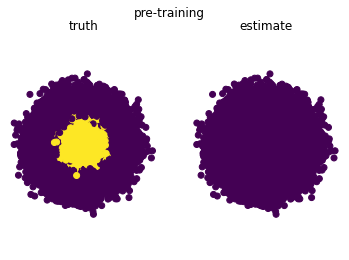

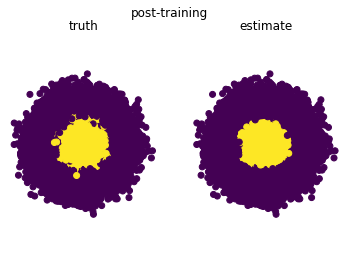

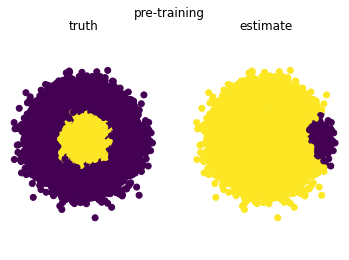

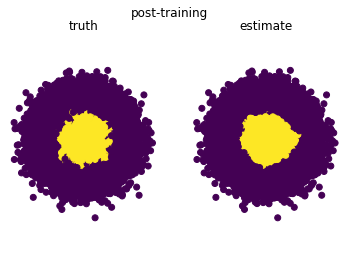

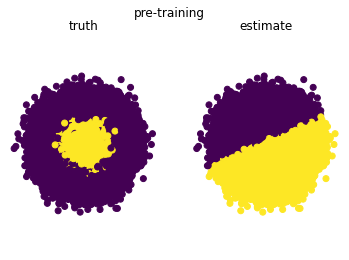

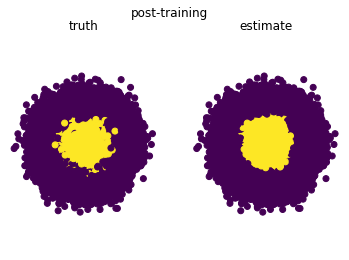

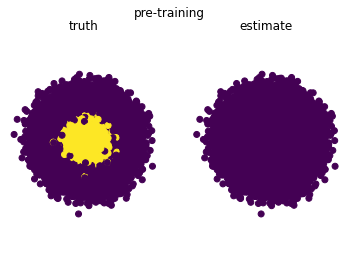

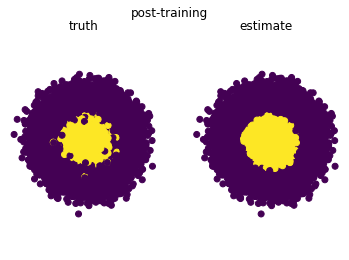

0 4


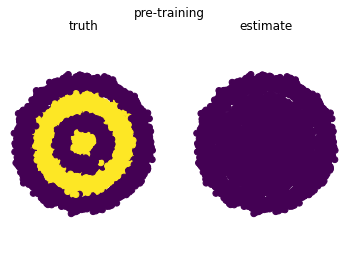

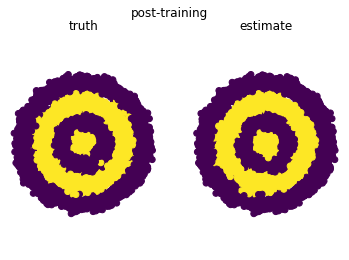

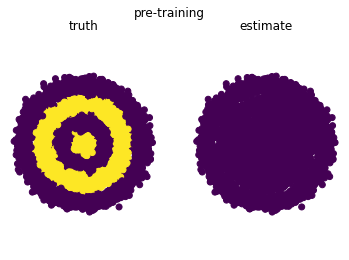

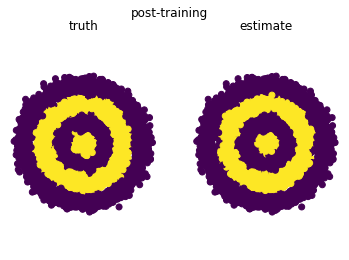

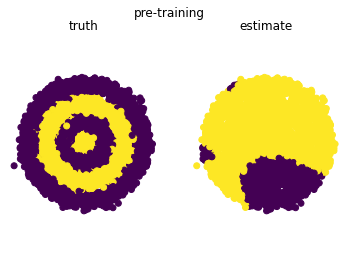

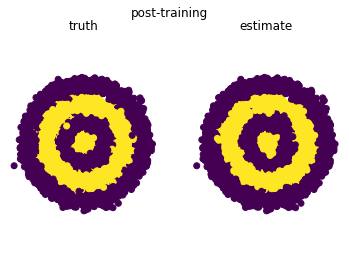

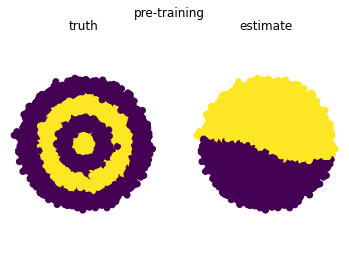

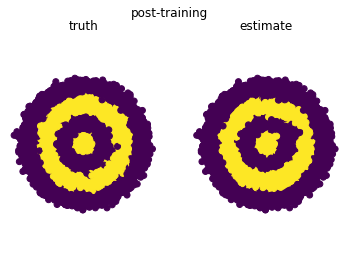

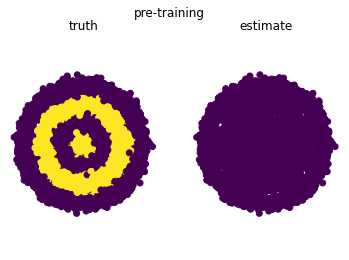

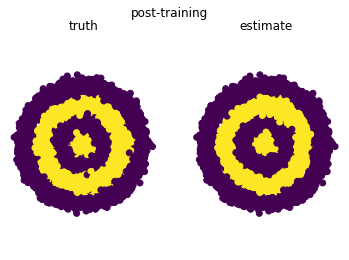

1 4


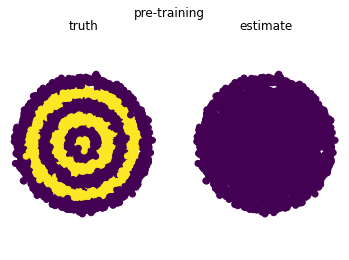

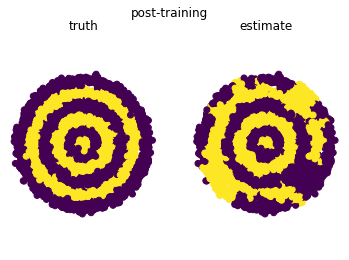

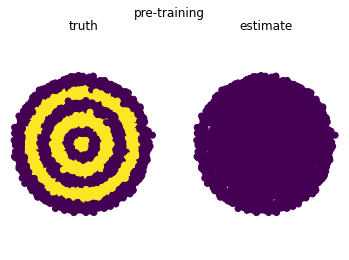

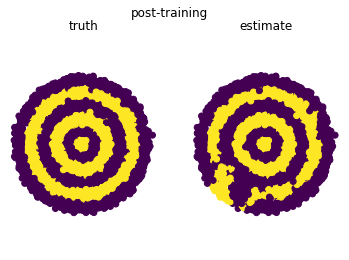

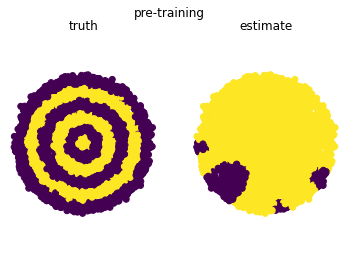

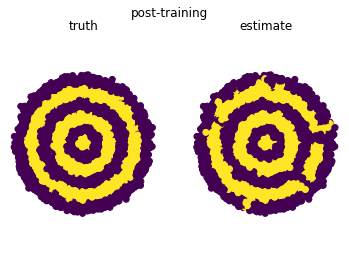

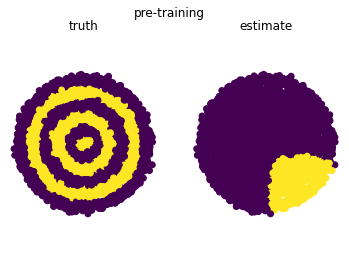

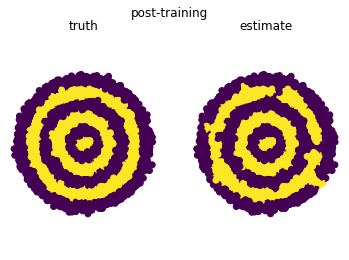

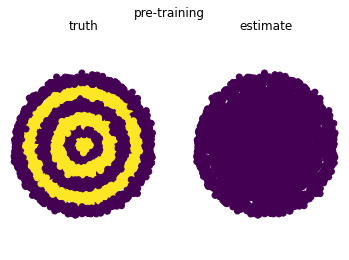

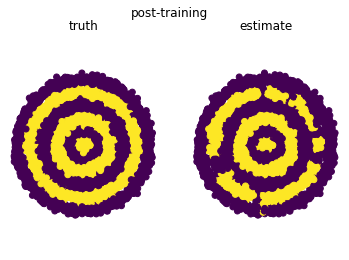

2 4


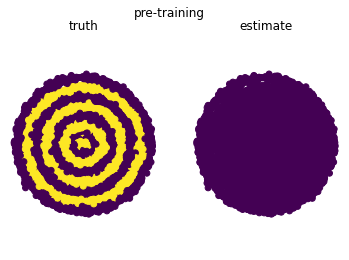

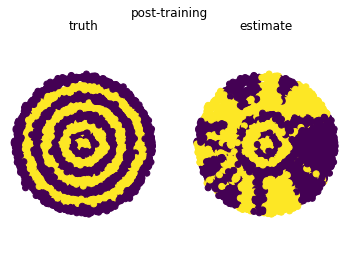

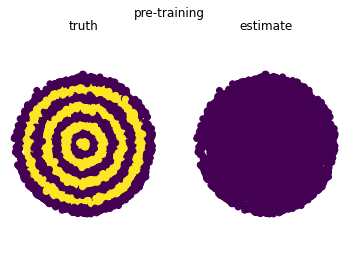

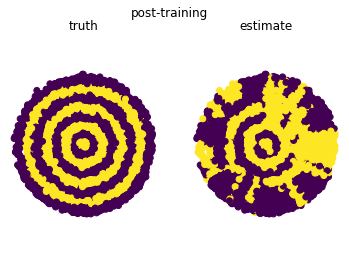

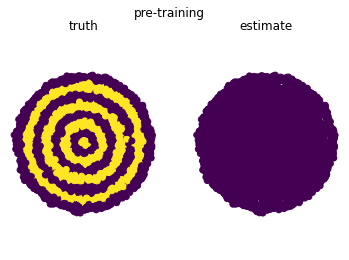

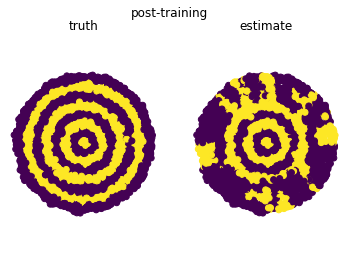

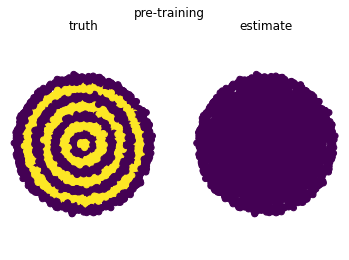

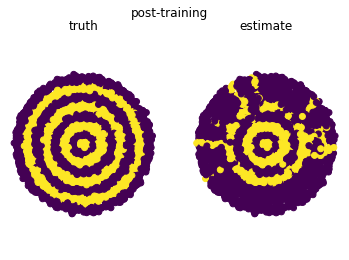

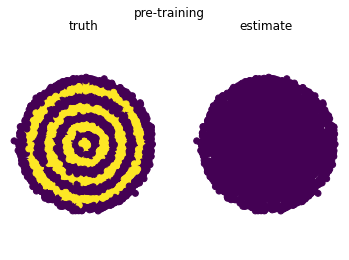

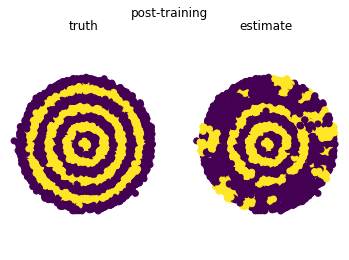

3 4


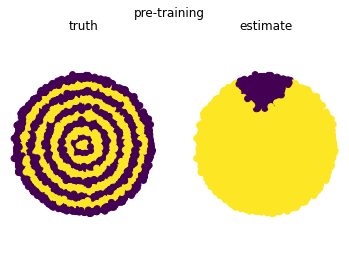

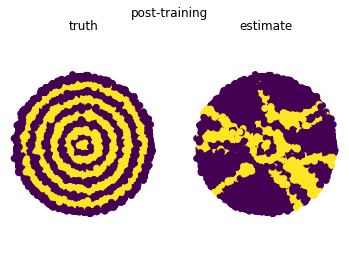

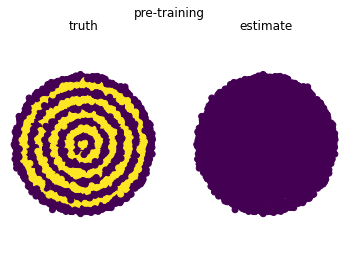

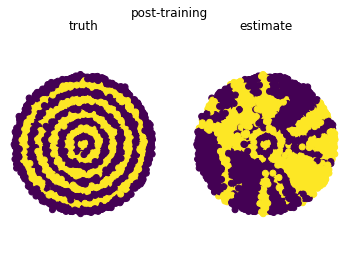

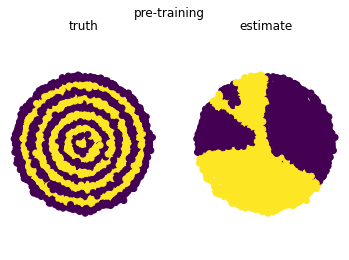

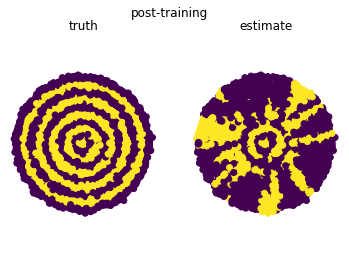

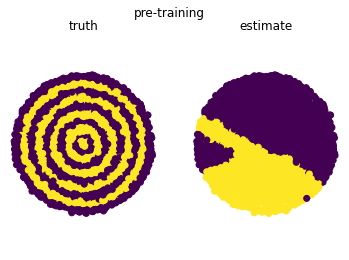

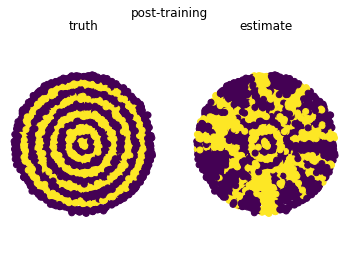

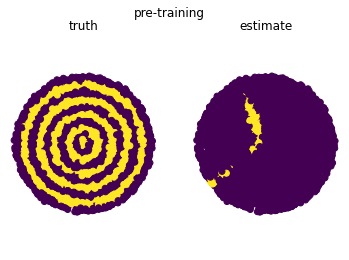

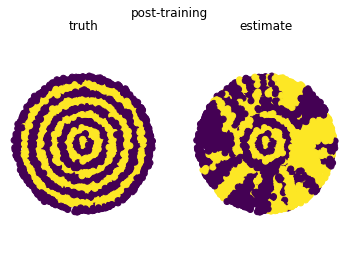

4 4


In [18]:
complexity_deg = 5
layers = np.arange(complexity_deg)*10 + 16

error = np.zeros((complexity_deg,complexity_deg))

"""
"""
in_dim = 2
nneuron = 24
out_dim = 2
nbatches = 1000

nepoch = 1000
learning_rate = 0.1

"""
"""

for nn in range(complexity_deg):
    for ll in range(complexity_deg):
        
        nneuron = layers[ll]
        
        ARCHITECTURE = [
                {'input_dim': in_dim, 'output_dim': nneuron},
                {'input_dim': nneuron, 'output_dim': nneuron},
                {'input_dim': nneuron, 'output_dim': out_dim},
            ]
        
        r_high_d, ident_high_d = gen_high_d_data(npts, nn)
        test_r_high_d,test_ident_high_d = gen_high_d_data(npts, nn)
        
        
        params,err = train_weights(ARCHITECTURE,nbatches,nepoch,learning_rate,r_high_d,ident_high_d,test_r_high_d,test_ident_high_d)
        error[nn,ll] = err
        
    print(nn,ll)


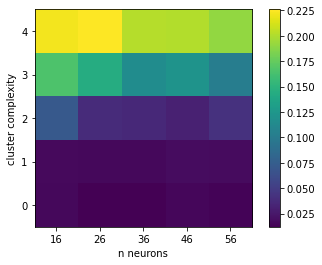

In [19]:
plt.imshow(error)
#plt.axis('off')
plt.colorbar()
plt.xlabel('n neurons')
plt.ylabel('cluster complexity')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticklabels([16,16,26,36,46,56])
plt.show()